# Data Science in Psychology & Neuroscience (DSPN): 

## Lecture 12. Data Wrangling (part 3)

### Date: October 3, 2023

### To-Dos From Last Class:

* Download <a href="https://github.com/hogeveen-lab/DSPN_Fall2023_Git/tree/main/assignment_starters/assign3_starter">Assignment #3 starter kit</a>

### Today:

* Wrangle some real data

### Homework
* Submit Assignment #3: <a href="https://www.dropbox.com/request/ggV5rAg3J9T0YxpEHLqX">Data Wrangling</a> (before 10/10, 23:00 MDT)

# Importing packages

In [13]:
### Part 1 --> Importing data wrangling packages I often use
import os
from glob import glob # only need the glob subpackage from glob
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt

# Setting up the filepaths

In [4]:
### Part 2 --> setting paths to the first level data

# get current working directory
base_dir = os.getcwd()

# Go above current working directory and
first_dir = os.path.join(base_dir,'misc/imitation_inhibition_paradigm/data/first')
P_file_pattern = 'P*.txt'
second_dir = os.path.join(base_dir,'misc/imitation_inhibition_paradigm/data/second')
questionnaire_file = os.path.join(second_dir,'ait_questionnaires.csv')

# Using glob to find all participant data files
all_files = glob(os.path.join(first_dir,P_file_pattern))

# Loading in a test subject to make sense of things

In [6]:
# load in an individual subject file
df_test = pd.read_csv(all_files[0],error_bad_lines=False,skiprows=5,sep='\t')
# subset to only experimental rows
df_test = df_test[df_test['Name.1']=='AI_Block']
# subset to only key releases
df_test = df_test[df_test['Released']=='Released']

# How many key realeases do we actually have?
print('How many rows in key release filtered data frame:',len(df_test))

# identify double responses
df_test['shift'] = df_test['Name.2'].shift()
df_test['double_response'] = np.where(df_test['Name.2']==df_test['shift'],1,0)
df_test = df_test[df_test['double_response']!=1]
print('How many rows in key release filtered data frame, after removing double responses?:',len(df_test))

How many rows in key release filtered data frame: 101
How many rows in key release filtered data frame, after removing double responses?: 100


# Iterating through to get all first level data, concatenating into a single data frame

In [8]:
# declare an empty list of data frame
dfs_list = []

# iterate through the files
for cur_file in all_files:
    # load in an individual subject file
    df_tmp = pd.read_csv(cur_file,error_bad_lines=False,skiprows=5,sep='\t')
    # subset to only experimental rows
    df_tmp = df_tmp[df_tmp['Name.1']=='AI_Block']
    # subset to only key releases
    df_tmp = df_tmp[df_tmp['Released']=='Released']
    # identify double responses
    df_tmp['shift'] = df_tmp['Name.2'].shift()
    df_tmp['double_response'] = np.where(df_tmp['Name.2']==df_tmp['shift'],1,0)
    df_tmp = df_tmp[df_tmp['double_response']!=1]
    # append to list of data frames
    dfs_list.append(df_tmp)

df_allsubjects = pd.concat(dfs_list,axis=0)

# Loading in the questionnaire data and merging it with behavioral data

In [9]:
# reading in questionnaire responses
questionnaire_file = os.path.join(second_dir,'ait_questionnaires.csv')
df_questionnaire = pd.read_csv(questionnaire_file)
# display(df_questionnaire)

# merge questionnaires with trial-level data
df_allsubjects = df_allsubjects.rename(columns={"Name": "pid"})
df_allsubjects = pd.merge(df_allsubjects,df_questionnaire,on="pid",how="outer")

# Writing the observation-level data to a big csv

In [10]:
out_filename = os.path.join(second_dir,'ait_trialwise.csv')
df_allsubjects.to_csv(out_filename,index=False)

## Quick tangent: Automatic Imitation Task

<img src="img/ait_task.png">

* __MAIN OUTCOME: HOW DO THE DIFFERENT CONGRUENT VS. INCONGRUENT CONDIS SLOW YOUR RESPONSE TIME?__

# Computing SECOND-level summary measures (mean RT by pid)

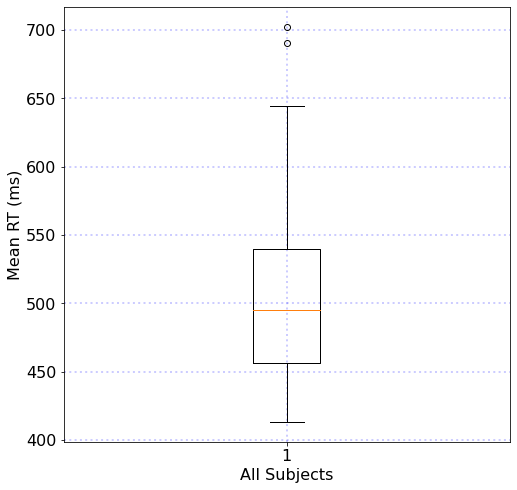

In [17]:
# computing mean RT by pid
mean_rt = df_allsubjects.groupby('pid')['Time'].mean()
plt.boxplot(mean_rt)
plt.xlabel('All Subjects')
plt.ylabel('Mean RT (ms)')
plt.grid(b=True,color='blue',alpha=0.2,linestyle=':',linewidth=2)
plt.rcParams.update({'font.size': 16})
plt.rcParams['figure.figsize'] = [5,8]
plt.show()

# Computing subject-level summary measures (mean RT by pid by condition)

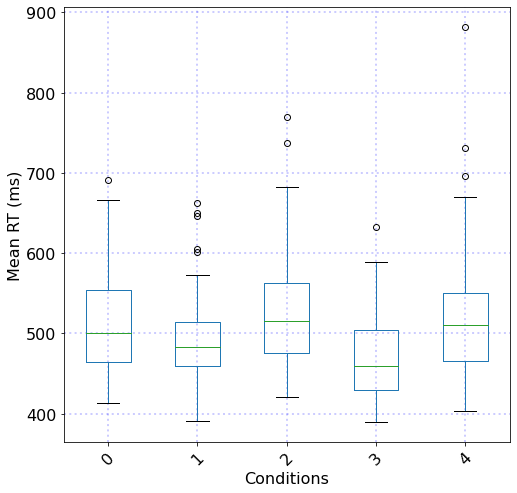

In [19]:
# computing mean RT by pid by condition
mean_cdn_rt = df_allsubjects.groupby(['pid','Congruence'])['Time'].mean().unstack()
# display(mean_cdn_rt)
# plotting figure
plot = mean_cdn_rt.boxplot()
plt.xticks(rotation = 45)
plt.xlabel('Conditions')
plt.ylabel('Mean RT (ms)')
plt.grid(b=True,color='blue',alpha=0.2,linestyle=':',linewidth=2)
plt.rcParams.update({'font.size': 16})
plt.rcParams['figure.figsize'] = [8,8]
plt.show()

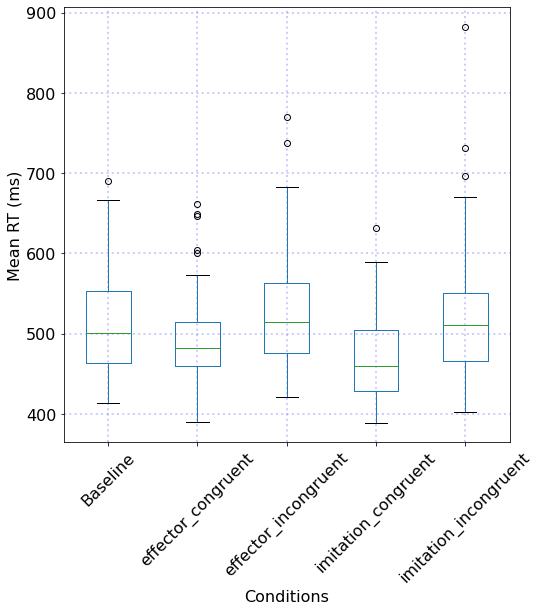

In [21]:
# take 2 with meaningful condi names
df_allsubjects['string_cong'] = np.where(df_allsubjects.Congruence==0,'Baseline',
                                        np.where(df_allsubjects.Congruence==1,'effector_congruent',
                                                 np.where(df_allsubjects.Congruence==2,'effector_incongruent',
                                                          np.where(df_allsubjects.Congruence==3,'imitation_congruent',
                                                                   np.where(df_allsubjects.Congruence==4,'imitation_incongruent','')))))

# computing mean RT by pid by condition
mean_cdn_rt = df_allsubjects.groupby(['pid','string_cong'])['Time'].mean().unstack()
# display(mean_cdn_rt)
# plotting figure
plot = mean_cdn_rt.boxplot()
plt.xticks(rotation = 45)
plt.xlabel('Conditions')
plt.ylabel('Mean RT (ms)')
plt.grid(b=True,color='blue',alpha=0.2,linestyle=':',linewidth=2)
plt.rcParams.update({'font.size': 16})
plt.rcParams['figure.figsize'] = [8,8]
plt.show()

# Writing the subject-level RT data to a CSV

In [22]:
# Writing the data to a second-level data frame that we will eventually play with in R
subj_out_filename = os.path.join(second_dir,'ait_subjectlevel.csv')
mean_cdn_rt.to_csv(subj_out_filename,index=True)

# Introducing Assignment #3

* <a href="https://github.com/hogeveen-lab/DSPN_Fall2023_Git/tree/main/assignment_starters/assign3_starter">Assignment #3</a>